In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import RMSprop 
from keras.callbacks import EarlyStopping 
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_final = x_train.reshape((-1, 784)) /255
x_test_final = x_test.reshape((-1, 784)) /255
y_train_final = to_categorical(y_train)
y_test_final = to_categorical(y_test)

In [ ]:
model = Sequential() 
model.add(Dense(512, kernel_initializer='normal', activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='mse', optimizer=RMSprop(), metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_final, y_train_final, batch_size=256, epochs=50, verbose=1, validation_split = 0.2, callbacks = [EarlyStopping(monitor = 'val_loss', patience = 20)])

Epoch 1/50
188/188 [==============================] - 2s 5ms/step - loss: 0.0379 - accuracy: 0.7301 - val_loss: 0.0083 - val_accuracy: 0.9463
Epoch 2/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0062 - accuracy: 0.9601 - val_loss: 0.0051 - val_accuracy: 0.9666
Epoch 3/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0040 - accuracy: 0.9751 - val_loss: 0.0048 - val_accuracy: 0.9701
Epoch 4/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0030 - accuracy: 0.9813 - val_loss: 0.0044 - val_accuracy: 0.9724
Epoch 5/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0025 - accuracy: 0.9843 - val_loss: 0.0047 - val_accuracy: 0.9705
Epoch 6/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0021 - accuracy: 0.9870 - val_loss: 0.0045 - val_accuracy: 0.9722
Epoch 7/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0017 - accuracy: 0.9901 - val_loss: 0.0041 - val_accuracy: 0.9755
Epoch 

In [ ]:
score = model.evaluate(x_test_final, y_test_final, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.003715082071721554
Test accuracy: 0.9800000190734863


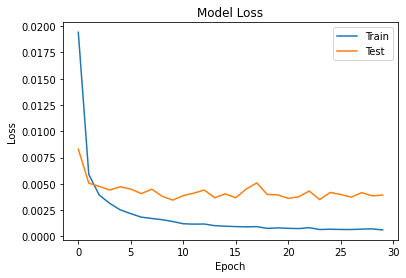

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

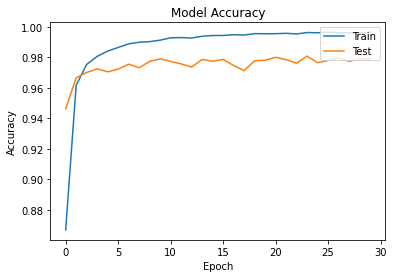

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()